In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
from scipy import stats
import math as mt

In [3]:
df = pd.read_csv("Yulu.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
df.isnull() # NO Null Entries as lernt from describtion

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

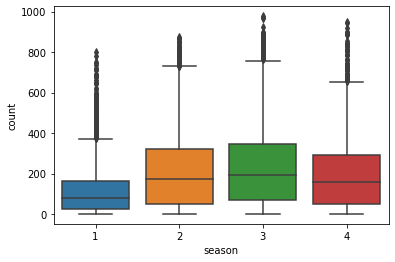

In [9]:
sbn.boxplot(x='season',y='count',data=df)

#season (1: spring, 2: summer, 3: fall, 4: winter)

<b>Spring has very less usuage of bikes can be great time for maintainance of bikes<b>

<AxesSubplot:xlabel='holiday', ylabel='count'>

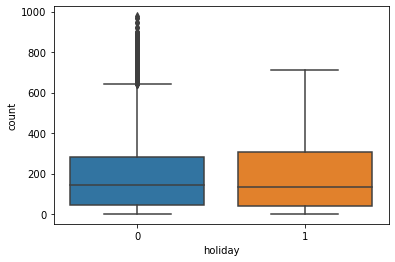

In [10]:
sbn.boxplot(x='holiday',y='count',data=df)

<b>Holidays seem to have slight edge over working day</b>

<AxesSubplot:xlabel='workingday', ylabel='count'>

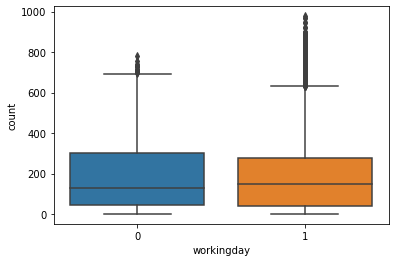

In [53]:
sbn.boxplot(x='workingday',y='count',data=df)

In [54]:
#workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

In [52]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<AxesSubplot:xlabel='weather', ylabel='count'>

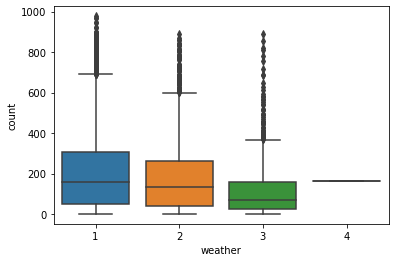

In [35]:
sbn.boxplot(x='weather',y='count',data=df)

Clearly clear weather is most preffered

<AxesSubplot:xlabel='temp', ylabel='count'>

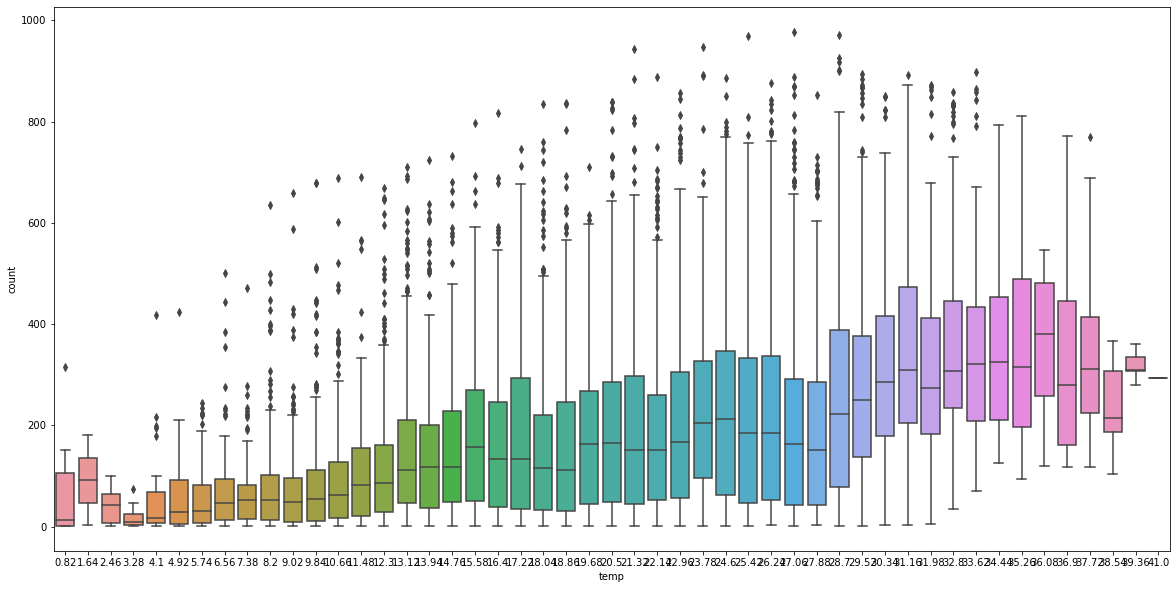

In [43]:
plt.figure(figsize=(20,10))
sbn.boxplot(x='temp',y='count',data=df)

In [124]:
df.temp.value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
13.12    356
17.22    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

In [25]:
df['year'] = df.hour.dt.year

In [27]:
df['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [28]:
df['hour'] = df.hour.dt.hour

In [29]:
df['hour'].value_counts()

23    456
20    456
16    456
15    456
17    456
22    456
14    456
18    456
21    456
19    456
13    456
12    456
7     455
6     455
0     455
8     455
11    455
10    455
9     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

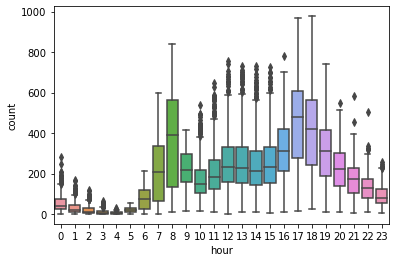

In [30]:
sbn.boxplot(x='hour',y='count',data=df)

In [59]:
df_working = df[df['workingday']==1]
df_holiday = df[df['workingday']==0]

In [60]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

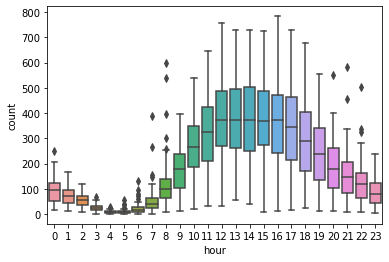

In [61]:
sbn.boxplot(x='hour',y='count',data=df_holiday)

<AxesSubplot:xlabel='hour', ylabel='count'>

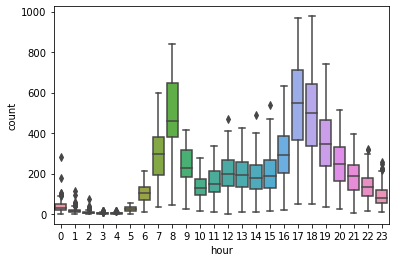

In [62]:
sbn.boxplot(x='hour',y='count',data=df_working)

# On holidays there is a Spike in bike usage during Business hours whereas on working day 8 and 17-18 hour time has high usuage


In [64]:
df_holiday['count'].sum()/3474 , df_working['count'].sum()/7412

(188.50662061024755, 193.01187263896384)

# Avg count of bikes on holiday and workingdays are 188 and 193 which seems same. But lets validate!

# from Midnight to Morning till 6-7 AM seems best time for maintainence 

In [65]:
# after removing the outliers and cheking our observations


<AxesSubplot:xlabel='workingday', ylabel='count'>

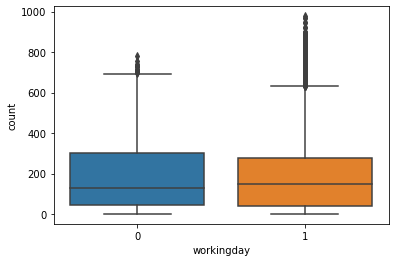

In [69]:
sbn.boxplot(x='workingday',y='count',data=df)

In [68]:
q1 = df['count'].quantile(0.25)
q3 = df['count'].quantile(0.75)
iqr=q3-q1
df1=df[(df['count']>(q1-iqr*1.5)) & (df['count']<(q3+iqr*1.5))]

<AxesSubplot:xlabel='workingday', ylabel='count'>

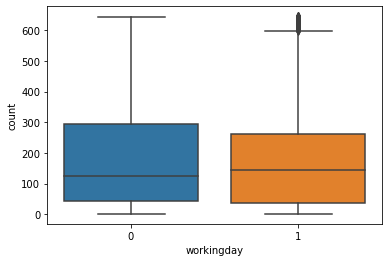

In [70]:
sbn.boxplot(x='workingday',y='count',data=df1)

In [71]:
df1.workingday.value_counts()

1    7161
0    3422
Name: workingday, dtype: int64

Still observation constant . working day does not seem to have significant impact

# Hypothesis testing now

One tailed test

$H_0:$ Count on weekday is equal to count on weekend

$H_1:$ Count on weekday greater equal to count on weekend
    
$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 > \mu_2$     

In [79]:
#alpha values at 0.05

In [90]:
working = df[df['workingday']==1]['count'].sample(3422)
weekend = df[df['workingday']==0]['count'].sample(3422)

In [91]:
working.std(), weekend.std()

(182.8450149732694, 173.46280826281637)

In [92]:
# Calculae the p-value

In [93]:
from scipy.stats import ttest_ind



In [94]:
test_stat, p_value = ttest_ind(working, weekend, equal_var = False, alternative = 'greater')

In [95]:
test_stat, p_value

(0.748261467216026, 0.227164125975429)

In [96]:
if p_value< 0.05:
    print("We reject the Null Hypothesis")
else:
    print("We accept the Null Hypothesis")

We accept the Null Hypothesis


# Count on weekday is equal to count on weekend

In [98]:
# Lets check for weather

In [99]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [100]:
weather1 = df[df['weather'] == 1]['count'].sample(859)
weather2 = df[df['weather'] == 2]['count'].sample(859)
weather3 = df[df['weather'] == 3]['count'].sample(859)

In [101]:
df.groupby('weather').describe()

season                                              holiday  \
          count      mean       std  min  25%  50%  75%  max   count   
weather                                                                
1        7192.0  2.497080  1.101190  1.0  2.0  3.0  3.0  4.0  7192.0   
2        2834.0  2.530346  1.150498  1.0  1.0  2.0  4.0  4.0  2834.0   
3         859.0  2.509895  1.125393  1.0  2.0  2.0  4.0  4.0   859.0   
4           1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0     1.0   

                   ...  hour          year                                 \
             mean  ...   75%   max   count         mean       std     min   
weather            ...                                                      
1        0.028365  ...  18.0  23.0  7192.0  2011.501808  0.500031  2011.0   
2        0.032463  ...  16.0  23.0  2834.0  2011.517996  0.499764  2011.0   
3        0.017462  ...  18.0  23.0   859.0  2011.449360  0.497719  2011.0   
4        0.000000  ...  18.0  18.0     1.0  2012.000000       NaN  2012.0   

                                         
            25%     50%     75%     max  
weather                                  
1        2011.0  2012.0  2012.0  2012.0  
2        2011.0  2012.0  2012.0  2012.0  
3        2011.0  2011.0  2012.0  2012.0  
4        2012.0  2012.0  2012.0  2012.0  

[4 rows x 96 columns]

Hypothesis

$H_0$: The mean count in different weather are equal.

$H_1$: The mean count in different weather are diffrerent

3 Population means - One way ANOVA could be appropritate test hhere provided normality are equality of variance assumptions are verified

Shapiro - Wilk Test to find normal distribution or not



In [102]:
from scipy.stats import shapiro

w,p_value = shapiro(df['count'].sample(4999))
p_value

0.0

In [103]:
# Not at all normal

C:\Users\PREDATOR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

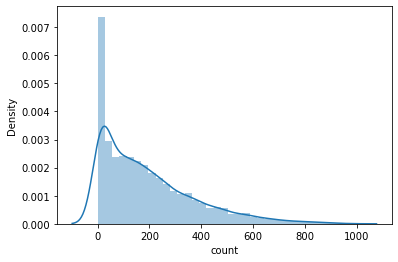

In [106]:
sbn.distplot(df['count'].sample(4999))

In [107]:
# Right skewed distribution

C:\Users\PREDATOR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

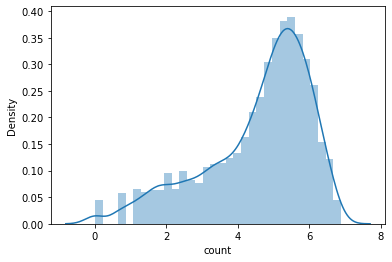

In [108]:
sbn.distplot(np.log(df['count'].sample(4999)))

# Levene's Test

H-0 : All the count variances are equal


H-1 : All the count variances are edifferent from the rest


In [109]:
from scipy.stats import levene
statistic,p_value = levene(weather1,weather2,weather3)

In [111]:
p_value>0.5

False

In [112]:
#Hence varience is different from the rest

In [113]:
if p_value< 0.05:
    print("We reject the Null Hypothesis")
else:
    print("We accept the Null Hypothesis")

We reject the Null Hypothesis


# Anova

In [114]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(weather1,weather2,weather3)


In [115]:
if p_value<0.05:
    print("As the p_value is less then level of significance Null Hypothesis is rejected")
else:
    print("As the p_value is gretaer then level of significance Null Hypothesis is accepted")

As the p_value is less then level of significance Null Hypothesis is rejected


# Hence Weather is a deciding factor for quantity of bikes being rented

In [116]:
# Find out season percentage
# 

In [117]:
#Season
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [118]:
season1 = df[df['season'] == 1]['count'].sample(2686)
season2 = df[df['season'] == 2]['count'].sample(2686)
season3 = df[df['season'] == 3]['count'].sample(2686)
season3 = df[df['season'] == 4]['count'].sample(2686)

In [119]:
test_stat, p_value = f_oneway(season1,season2,season3,season4)

In [121]:
if p_value<0.05:
    print("As the p_value is less then level of significance Null Hypothesis is rejected")
else:
    print("As the p_value is greater then level of significance Null Hypothesis is accepted")

As the p_value is less then level of significance Null Hypothesis is rejected


# Hence Season is also deciding factor for quantity of bikes being rented 